# Subplots

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

If we look at the subplot documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number.

In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.

For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and set the first axis to be the current axis.

<IPython.core.display.Javascript object>


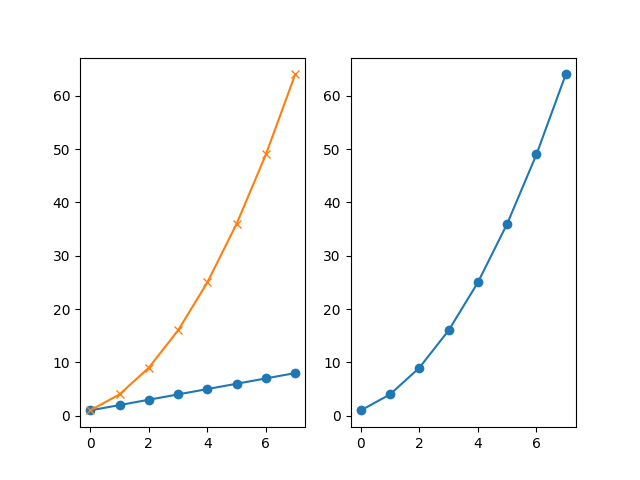

In [3]:
plt.figure()
plt.subplot(1,2,1)
linear_data=np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data,'-o')

In [4]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [5]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

This demonstrates a common problem, it looked like linear had roughly the same area under the line on the chart until we asked matplotlib to put them into one graph. Then the y axis was refreshed.

<IPython.core.display.Javascript object>


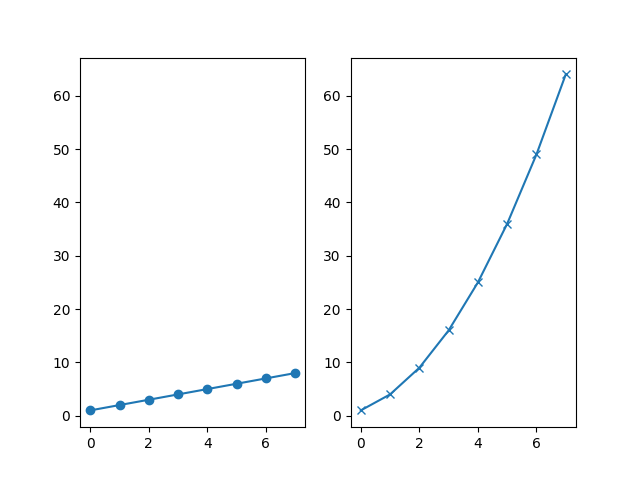

In [6]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


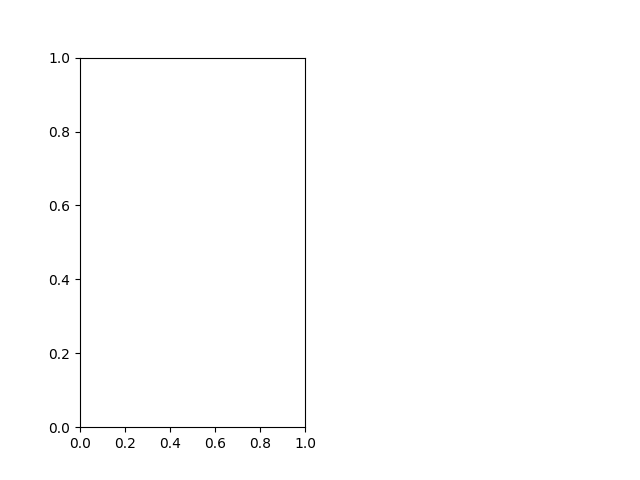

True

In [7]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


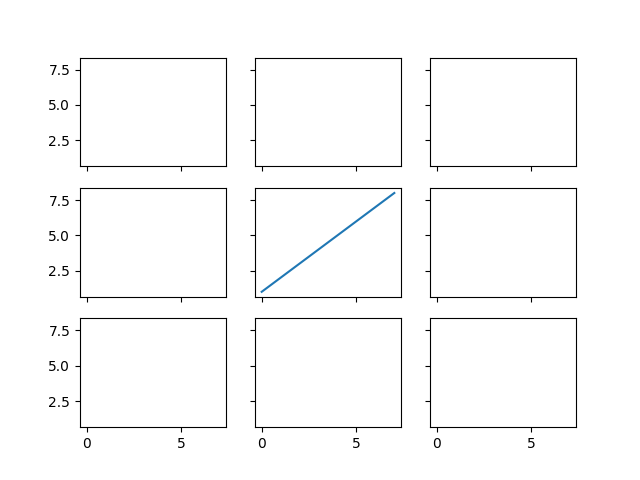

In [8]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [10]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [11]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

<IPython.core.display.Javascript object>


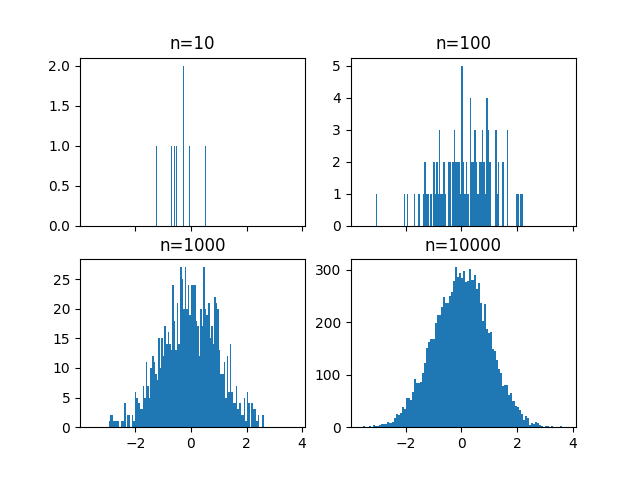

In [3]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

The GridSpec allows you to map axes over multiple cells in a grid.

<IPython.core.display.Javascript object>


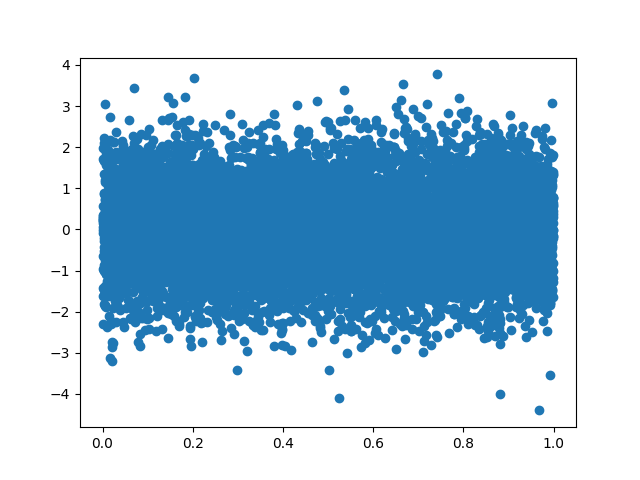

In [4]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

it's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear.

I'm going to define a 3x3 grid, nine cells in total. I want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side.
The original scatter plot can take up a two by two square in the bottom right.

When we add new items with the subplot, instead of specifying the three numbers of row, column and position, we pass in the elements of the GridSpec object which we wish to cover. And very important here. Because we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use slicing for the beginning or ends of lists.

<IPython.core.display.Javascript object>


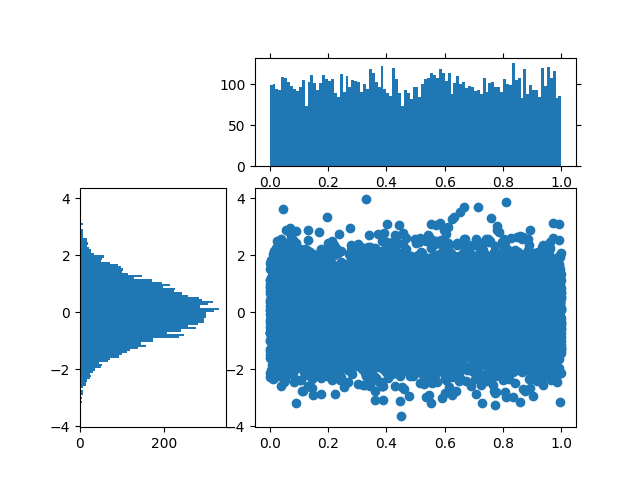

In [5]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec=gridspec.GridSpec(3,3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [12]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [13]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal')
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [10]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box and Whisker plots

A box plot. Sometimes called a box-and-whisker plot is a method of showing aggregate statistics of various samples in a concise matter.

The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range.

In [3]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [4]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.013261,0.500161,2.008246
std,0.999595,0.288241,1.413028
min,-3.713848,0.000008,0.021932
25%,-0.687694,0.253912,0.954392
50%,-0.012155,0.497082,1.677033
75%,0.658832,0.749114,2.726117
max,4.204265,0.999969,10.014040


Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. 

In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines which are capped are then drawn out to the minimum and maximum values.

<IPython.core.display.Javascript object>


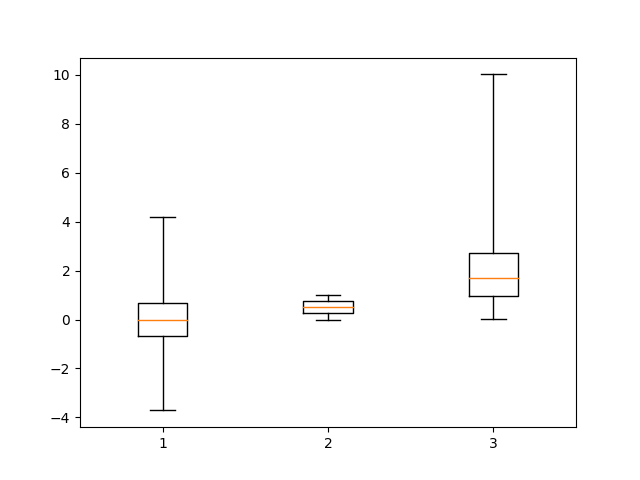

In [6]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis=10000.0)
# whis tells the box plot to set the whisker values all the way out to the minimum and maximum values

In [8]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=10000.0)

if we look at the gamma distribution, for instance, we see the tail of it is very, very long. So the maximum values are very far out.

<IPython.core.display.Javascript object>


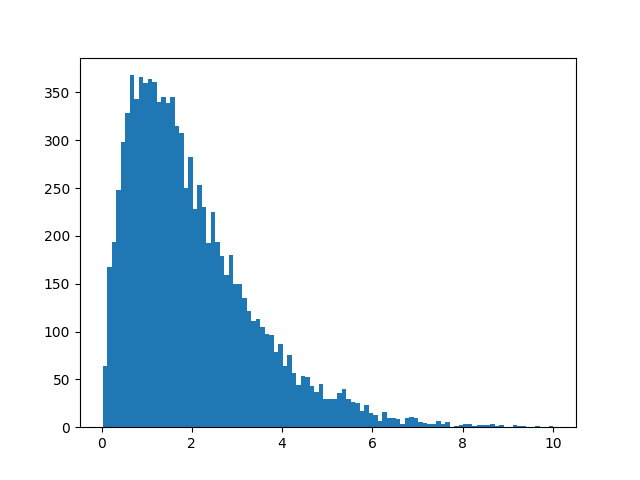

In [9]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

We can actually overlay an axes on top of another within a figure. Now, this functionality isn't in the basic matplotlib space, but it's in the toolkits, which tend to ship with matplotlib.

The toolkit that we're going to use is called the axes grid, and we import it from the mpl_toolkits.axes_grid1.inset_locator.

We create a new figure and we put up our box plot.

Then we just call the inset locator and pass it the current axes object we want composition on top of, followed by the size of our new axis. And we can specify this as both a width and a height in percentage from the parent axes. Then we give it a number from the place in which we wanted to drop the new axes.

<IPython.core.display.Javascript object>


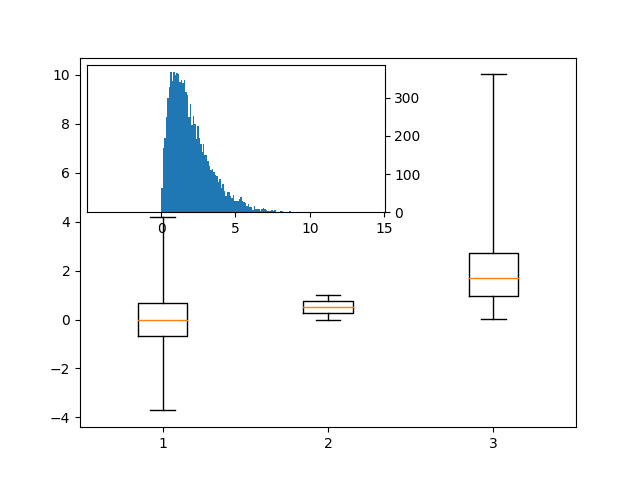

In [11]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=10000.0)
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [12]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

if you don't supply the whis argument, the whiskers actually only go out to halfway between the interquartile range.

<IPython.core.display.Javascript object>


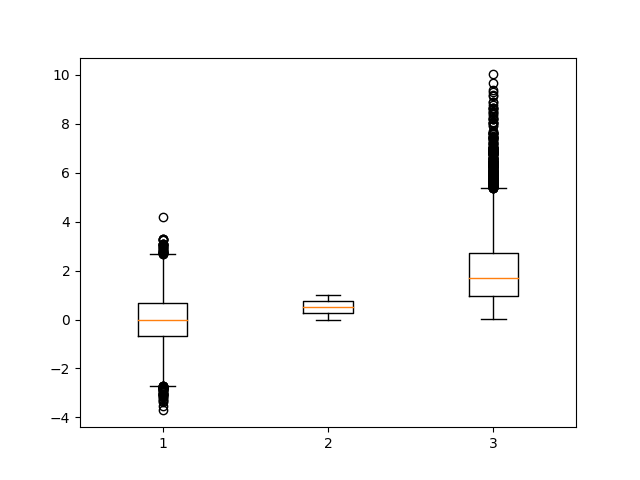

In [13]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions.

<IPython.core.display.Javascript object>


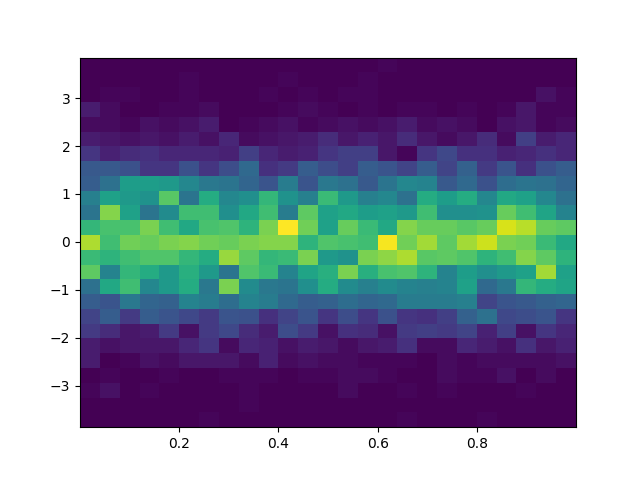

In [14]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


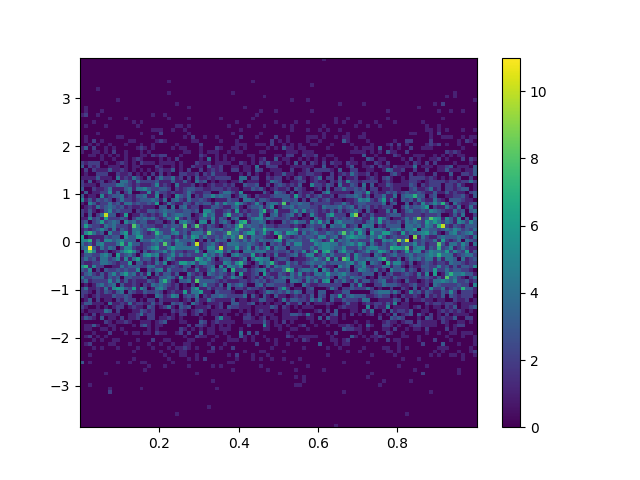

In [15]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [16]:
# add a colorbar legend
plt.colorbar()

# Animation

The Maplotlib.animation module contains important helpers for building animations.

For our discussion, the important object here is to call FuncAnimation. And it builds an animation by iteratively calling a function which you define. Essentially, your function will either clear the axis object and redraw the next frame, which you want users to see or will return a list of objects which need to be redrawn.

Let's see an example. First, let's import the animation module.

Next, let's define a cut-off for our animation.

I'd like to show you how the histogram is built from one sample through 100 samples. So let's set our cut off to 100 then randomly pick 100 numbers and put them into a variable.

Okay, next we want to actually create a function which will do the plotting. We'll call this function update. Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this is as the index into our array values, which we called x.

The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the stop object on the event source object attached to the FuncAnimation object.

We're going to call our animation a. So, I'll just use that here. I didn't know we can just drop plot as per normal. So lets first clear the current axis with cla, then create a histogram using a set of value in the x up to the current value. Slicing is great for this. Now we also need to consider the bins. Previously we just passed a single number in for the bins eg 10 or 100.

But we can also pass in the spacing in between bins.

Since we want all of our bins set and evenly spaced, because we're redrawing the animation in each clock tick, we can use the NumPy arange function. This will ensure that the bins don't change. We use the balance of minus 4 to plus 4, in half-step increments.

We also need to set the axis values since otherwise, the histogram will continually autoscale between frames which could be annoying. So I'll just hard code some values here, often the bin sizes and use 30 as an x and a couple of labels and titles to make the chart look a little better.

Finally, let me show you another text function called annotate.

This places text at a certain position in the chart and we'll use it to show how many samples are currently being rendered to the screen.

Now let's just generate a new figure, then call the FuncAnimation constructor and we'll assign this to variable a.

The first parameter is the figure that we're working with. This isn't so important here, since we're using the pipe plot scripting interface to manage the figure. Then the name of our function and then the amount of time we want between updates. Let's set this to 100 milliseconds.

Also, remember that we have to set this to variable a. Otherwise, our function isn't going to know how to stop the animation.



In [17]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [18]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


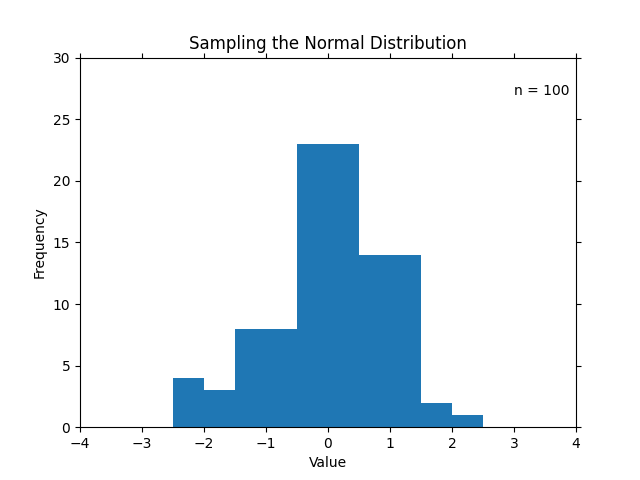

In [19]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


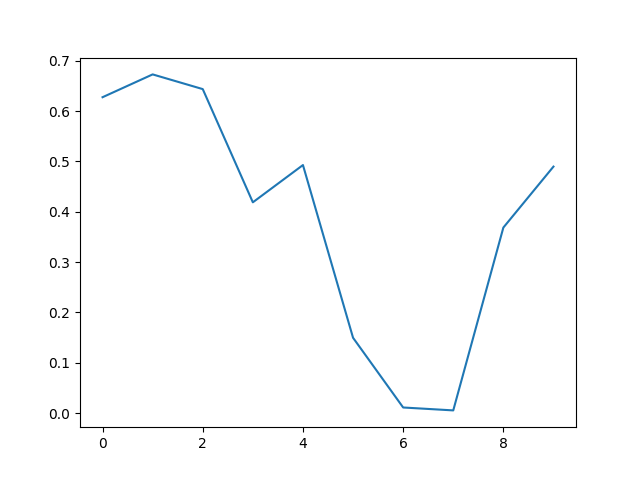

9

In [20]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [21]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.764825,0.230320,UK
1,0.755986,0.909328,Chile
2,0.036717,0.166120,Canada
3,0.242955,0.980520,Germany
4,0.184557,0.877969,Mexico
5,0.139060,0.072502,China
6,0.522589,0.519573,Brazil
7,0.552763,0.645223,India
8,0.076277,0.446350,USA
9,0.269889,0.559385,Iraq


<IPython.core.display.Javascript object>


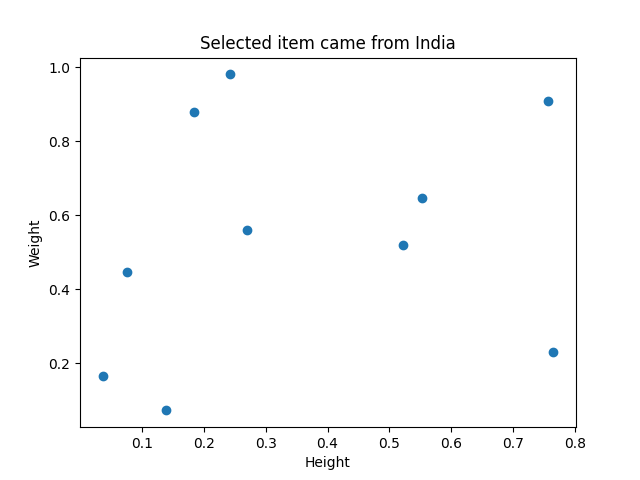

Text(0.5, 0, 'Height')

In [22]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [23]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9